# Counting Words

This Notebook introduces some basic concepts in Python. At the end, users will be able to use their knowledge to count and plot words from the Old Bailey and the 19th-century British Parliamentary Debates (also known as "Hansard"). During the latter exercise, we will perform a comparative analysis of word counts for multiple decades. This will give us an opportunity to think critically about whether word counts can help us to see change over time.

### Python Basics

When performing textual analysis we often work with sentences like the following:

In [1]:
jane_austen_quote = 'It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife'

`jane_austen_quote` is a dummy variable that has been assigned our quote from Jane Austen. We could have named this variable anything, like "sentence" or "austen_quote." Its name does not matter. We just need to assign the quote to a variable (e.g. `jane_austen_quote`) in order to start doing things to it with code. 

Now I can add an exclamation point to the end of `jane_austen_quote` like so:

In [2]:
print(jane_austen_quote + '!')

It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife!


But what if I wanted to add an exclamation point after every word instead of to the end of the sentence? I would have to first "split" the sentence into words. 

In [3]:
word_list = jane_austen_quote.split()

print(word_list)

['It', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife']


Using `split()` gives me a list of words. Now I can do things to each word of the sentence instead of just the full sentence.

To add an exclamation point after every word I can access each word in the list and add `!` after it. 

But, wow, that's a lot of repetitive typing.

In [4]:
print(word_list[0] + '!')
print(word_list[1] + '!')
print(word_list[2] + '!')
print(word_list[3] + '!')
print(word_list[4] + '!')
print(word_list[5] + '!')
print(word_list[6] + '!')
print(word_list[7] + '!')
print(word_list[8] + '!')
print(word_list[9] + '!')
print(word_list[10] + '!')
print(word_list[11] + '!')
print(word_list[12] + '!')
print(word_list[13] + '!')
print(word_list[14] + '!')
print(word_list[15] + '!')

It!
is!
a!
truth!
universally!
acknowledged!
that!
a!
single!
man!
in!
possession!
of!
a!
good!
fortune!


. . . and you get the point.

Another way I could do this is with a for loop. You can read the syntax of the following for loop like this: "for every word in `word_list`, print the word with an added exclamation point." 

In [5]:
for word in word_list: # loop through each word in word list
    print(word + '!')  #  print the word with an !

It!
is!
a!
truth!
universally!
acknowledged!
that!
a!
single!
man!
in!
possession!
of!
a!
good!
fortune!
must!
be!
in!
want!
of!
a!
wife!


For our purposes it is not important to have a deep understanding of for loops. But we did want to introduce them to you becuase you will see them again! (Like in this very Notebook.)

### Counting Words

Now that we understand how to work with sentences a little better, let's count words! We can use `.count()` to see how often words are mentioned.

In [6]:
word_list.count('a')

4

In [7]:
word_list.count('truth')

1

### Counting Words with "Counter"

`.count()` is useful if we want to see how often an individual word is stated in a text, but more often than not we want a word count for the entire document. 

One easy way to count all the words in a document is by using the `Counter()` command from the "collections" module. In the world of Python, a "module" is like an additional library that gives us more commands than what are typically provided by the base language. If you try to use `Counter()` without first loading the module, you will receive an error: `NameError: name 'Counter' is not defined`. 

In [8]:
from collections import Counter

In [9]:
word_count = Counter(word_list)

print(word_count)

Counter({'a': 4, 'in': 2, 'of': 2, 'It': 1, 'is': 1, 'truth': 1, 'universally': 1, 'acknowledged': 1, 'that': 1, 'single': 1, 'man': 1, 'possession': 1, 'good': 1, 'fortune': 1, 'must': 1, 'be': 1, 'want': 1, 'wife': 1})


We have to give `Counter()` a list of words or else we may not get the intended results. To see what I mean, let's try to use `Counter()` on the entire sentence instead of the word list.

In [10]:
quote_count = Counter(jane_austen_quote)

print(quote_count)

Counter({' ': 22, 'a': 9, 'n': 9, 't': 8, 's': 8, 'e': 8, 'o': 8, 'i': 7, 'u': 4, 'l': 4, 'f': 4, 'r': 3, 'w': 3, 'd': 3, 'g': 3, 'h': 2, 'm': 2, 'I': 1, 'v': 1, 'y': 1, 'c': 1, 'k': 1, 'p': 1, 'b': 1})


Whoops, that's a mess!

### Viewing Top Words

We can now use `.most_common()` on our word count to see the top words and their counts. 

In [11]:
word_count.most_common(10)

[('a', 4),
 ('in', 2),
 ('of', 2),
 ('It', 1),
 ('is', 1),
 ('truth', 1),
 ('universally', 1),
 ('acknowledged', 1),
 ('that', 1),
 ('single', 1)]

### Counting Words in an Old Bailey Trial

Now let's put our knowledge of words counts to the test! We are now going to count the words in an Old Bailey Trial from 1911. 

The following code "scrapes" the trial text from the web page's HTML so we can the count words. 

You can put that put that URL in your browser to see which trial we are working with. You can also replace that URL with a different one, like an article from NPR (try: https://www.npr.org/2022/07/07/1110226702/boris-johnson-resignation-prime-minister-uk). 

In [12]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.oldbaileyonline.org/browse.jsp?id=t19110228-43&div=t19110228-43'

source = requests.get(url) # get the data from the URL

page_content = BeautifulSoup(source.text, 'html.parser').find_all('p') # "parse" the data and find all text with paragraph anchors

text = []
for paragraph in page_content: # do some additional cleaning. For each paragraph, "strip" the strings (i.e. get rid of anchors left over from the HTML)
    text.extend(paragraph.stripped_strings) # put each new, cleaned paragraph in our (once) empty list, text

In [13]:
text[:10] # show just the first 10 items in text

["MORRISON, Stinie (29, baker), was indicted                                           for and charged on the Coroner's inquisition with the wilful murder of",
 'Leon Beron.',
 'Mr. Muir, Mr. Leycester, and Mr. Oddie prosecuted; Mr. Abinger, Mr. Macgregor (and subsequently Mr. Roland Oliver) defended.',
 'Police-constable',
 'DAVID DAVIS',
 ', 545 W, proved plans.',
 'Police-constable',
 'JOSEPH MUMFORD',
 ', 863 W. At 8.10 a.m. on January 1 I was on duty on Clapham Common. Walking along the path that leads from the bandstand to Lavender Gardens I saw close to the path and lying amongst some bushes the body of a dead man. I just picked up his left hand and dropped it again. I sent for assistance, and other police officers and the divisional surgeon arrived.',
 'Cross-examined. I saw some footprints; I cannot say how many; I did not take an impression of them. There was a pool of blood at the side of the railings and a trail of blood from the railings across the path. The body had a gre

Now we can clean our scraped text by removing symbols (e.g. periods, parenthesis, commas, etc.) and returning the trial text as a list of words (remember, we need a list if we want to count words).

In [14]:
body_text = ''.join(text).lower() # join the text into one sentence and transform all words to lower case

remove = ['(', ')', '.', ',', ';', '\''] # make a list of items we wish to remove

for symbol in remove: # loop through every item 
    body_text = body_text.replace(symbol, '') # if that item is present in the text, replace it with nothing (i.e. '' has nothing in between)

old_bailey_word_list = body_text.split() # split the text so we get that list of words we need in order to use Counter()

In [15]:
print(old_bailey_word_list[:100])

['morrison', 'stinie', '29', 'baker', 'was', 'indicted', 'for', 'and', 'charged', 'on', 'the', 'coroners', 'inquisition', 'with', 'the', 'wilful', 'murder', 'ofleon', 'beronmr', 'muir', 'mr', 'leycester', 'and', 'mr', 'oddie', 'prosecuted', 'mr', 'abinger', 'mr', 'macgregor', 'and', 'subsequently', 'mr', 'roland', 'oliver', 'defendedpolice-constabledavid', 'davis', '545', 'w', 'proved', 'planspolice-constablejoseph', 'mumford', '863', 'w', 'at', '810', 'am', 'on', 'january', '1', 'i', 'was', 'on', 'duty', 'on', 'clapham', 'common', 'walking', 'along', 'the', 'path', 'that', 'leads', 'from', 'the', 'bandstand', 'to', 'lavender', 'gardens', 'i', 'saw', 'close', 'to', 'the', 'path', 'and', 'lying', 'amongst', 'some', 'bushes', 'the', 'body', 'of', 'a', 'dead', 'man', 'i', 'just', 'picked', 'up', 'his', 'left', 'hand', 'and', 'dropped', 'it', 'again', 'i', 'sent', 'for']


We can now use `Counter()` and find the top words in the trial.

In [16]:
trial_count = Counter(old_bailey_word_list)

trial_count.most_common(15)

[('the', 1957),
 ('i', 1883),
 ('to', 953),
 ('and', 831),
 ('a', 708),
 ('was', 700),
 ('of', 618),
 ('in', 600),
 ('he', 535),
 ('on', 528),
 ('not', 503),
 ('that', 499),
 ('it', 452),
 ('at', 412),
 ('have', 322)]

Well . . . that's not very interesting . . . our top words are just made up things like "the" or "and." And it's very possible that any document we count will return something similar.

Analysts who work with text-as-data have a term for words like these--they're called "stop words"--and for the sake of our resesarch, we can simply remove them. 

In [17]:
stop_words = ['the', 'i', 'to', 'was', 'of', 'in', 'me', 'about', 'and', 'a', 'on', 'not', 'that', 'at', 'it', 'have', 'had', 'my',
              'with', 'for', 'is', 'did', 'as', 'there', 'from', 'or', 'were', 'been', 'but', 'they', 'when', 'went', 'do', 'this', 'two',
              'would', 'we', 'saw', 'never', 'be', 'before', 'an', 'got', 'after', 'say', 'some', 'see', 'them', 'up', 'go', 'because',
              'seen', 'no', 'came', 'out', 'asked', 'took', 'cannot', 'what', 'you', 'could', 'if', 'by', 'which', 'told', 'any', 'has',
              'put', 'are', 'then', 'other', 'mr', 'made', 'should', 'into', 'where', 'used', 'said', 'last', 'think', 'said', 'left',
              'one', 'whether', 'gave', 'only', 'am', 'pm', 'very', 'come', 'all', 'between', 'statement', 'first', 'three', 'remember',
              'every', 'who', 'take', 'can', 'said', 'know', 'him', 'his', 'her', 'hers'
              ]

To remove stop words, let's go back to `old_bailey_word_list` and do some additional cleaning. 

This time we are going to remove any word in `old_bailey_word_list` that is also in `stop_words`. 

The following code can be read like this: "for every word in `old_bailey_word_list` if that word is not in `stop_words`, keep it! Otherwise, don't!"

In [18]:
clean_old_bailey_word_list = []

for word in old_bailey_word_list: # for every word in our word list
    if word not in stop_words: # if the word is not in stop words 
        clean_old_bailey_word_list.append(word) # keep it and add it to our new list (named "clean_old_bailey_word_list")

clean_trial_count = Counter(clean_old_bailey_word_list)

In [19]:
clean_trial_count.most_common(15)

[('he', 535),
 ('prisoner', 192),
 ('street', 136),
 ('time', 112),
 ('police', 108),
 ('january', 98),
 ('exhibit', 84),
 ('night', 83),
 ('man', 82),
 ('deceased', 78),
 ('road', 68),
 ('court', 64),
 ('december', 61),
 ('murder', 60),
 ('she', 59)]

This looks much better! If you want you can remove even more words by adding them to `stop_words`.

### Visualizing Our Results

Now let's visualize our top words. Visualization is an important step in analysis becuase it makes it helps us communicate our findings to others. In the following code we take our top 25 words and plot them on a bar chart. 

In [20]:
top_words = dict(clean_trial_count.most_common(25))

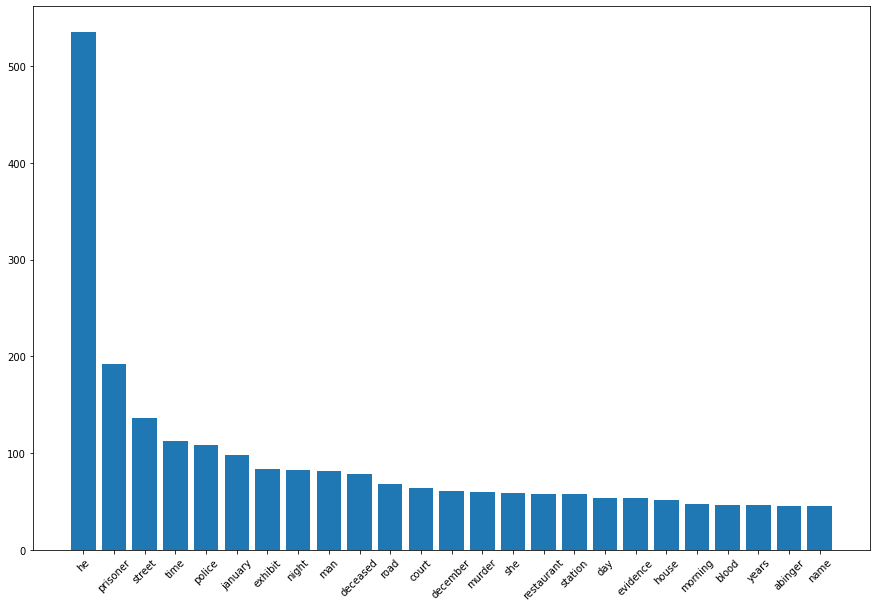

In [22]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10] # define the size of the image

plt.bar(range(len(top_words)), list(top_words.values()), align = 'center') # define the data you are plotting
plt.xticks(range(len(top_words)), list(top_words.keys())) # label the x axis ticks
plt.xticks(rotation = 45) # rotate 45 degrees so the ticks are easier to read
plt.show() # render the plot 

### Counting Words in the C19 Hansard Corpus

Now we are going to count words at a greater scale using the 19th-century British Parliamentary debates (also known as "Hansard"). We will count words of just the sentences containing the word "woman" from three decades -- 1820, 1860, and 1880 -- to see whether the words used in sentences regarding women change over time. Our goal is to perform a comparative analysis of the word counts. 

But first -- in order to do this job efficiently -- we are going to add another tool to our Python toolbelt: the "function." While it is not important to have a deep understanding of functions for this week, we do want to introduce them to you becuase you will see them again!

### Defining Functions

Imagine you are in you kitchen baking cookies. You want each cookie to be the shape of a star. One way to do this would be to use a knife to carve each star, one-by-one, in your dough. But that would be very laborious! A knife might be the wrong tool to use.

Instead you could make a mold of a star and then use that mold to cut the rest of your stars. Importantly, if you use a mold then you only have to make the star shape once.

Functions in code work the same way. To see what I mean, let's revisit our quote from Jane Austen and write a function that adds an exclamation point to the end of the sentence, transforms the words to lower case, and splits the sentence into a list of words. 

In [23]:
def string_splitter(input_string): # "string_splitter" splits our sentence into individual words and transforms the words to lower case
    added_punctuation  = input_string + '!'
    lower_case_words = added_punctuation.lower()
    word_list = lower_case_words.split()
    return word_list # functions must have a return statement, or else we will input our data and we won't receive anything in return

In the above code, `string_splitter()` takes an input -- a string -- and then performs each operation. The function is terminated with a `return` statement. If we forget the return statement then we would input the data but get nothing back.

In [24]:
jane_austen_word_list = string_splitter(jane_austen_quote)

print(jane_austen_word_list)

['it', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife!']


Now we can reuse the code from `string_splitter()` without rewriting every line.

In [25]:
charles_dickens_quote = 'It was the best of times, it was the worst of times'

charles_dickens_quote = string_splitter(charles_dickens_quote)

print(charles_dickens_quote)

['it', 'was', 'the', 'best', 'of', 'times,', 'it', 'was', 'the', 'worst', 'of', 'times!']


In [26]:
shakespeare_quote = 'We know what we are, but know not what we may be'

shakespeare_quote = string_splitter(shakespeare_quote)

print(shakespeare_quote)

['we', 'know', 'what', 'we', 'are,', 'but', 'know', 'not', 'what', 'we', 'may', 'be!']


Why did we learn how to write functions? Becuase we are going to analyze three different data sets and each data set will need to be imported, cleaned, and restructured so that it is a list of words that can be given to `Counter()`. By defining a function we will only need to write the code to clean and structure our data once. 

### Working with (Bigger) Historical Data

19th-century Britain experienced many transformations in the way it viewed women. The 1860s, for example, saw the Contagious Diseases Acts -- a series of nation-wide regulations placed on women's bodies -- as they were deemed to be the sources of illness for British soldiers.

We are going to count words from sentences with the word "woman" from three decades -- 1820, 1860, and 1880 -- to see if we can see changes in the way that sentences regarding women have changed over time.

### Reading the Hansard Corpus

We wrote the code to import data sets for this week for you becuase the process is a little complex. Though, you should recognize the purpose of multiple lines! 

The following function imports the data as a list-of-lists. A list-of-lists is a "2-dimensional" object (a list within another list) and so we need to flatten it into a "1-dimensional" list so it is the same structure as the lists we have been giving `Counter()`.

In [53]:
import json 
import re

def flatten_list(period_words): # this flattens the 2-dimensional object into a flat object to be used with Counter()
    flat_list = []
    
    for list in period_words:
        for word in list:
            flat_list.append(word)
                
    return flat_list

def data_import(working_dir):

    with open(working_dir, newline = '') as f: # read the file as a list-of-lists
            reader = json.loads(f.read()) # read the JSON file as a Python object 
            data = list(reader)[1:]
            data = list(map(str, data))
            
    data = [re.sub(r'\\\\n|\\\\t', '', word) for word in data] # remove line breaks, tab breaks, and possessive "s"
    data = [re.sub(r'[^\w\s]|_', '', word) for word in data] # remove punctuation and underscore
    data = [re.sub(r'\d{1, 3}', '', word) for word in data] # remove digits that are a minimum of 1 and a maximum of 3
    data = [re.sub(r'\w*\d\w*', '', word) for word in data] # remove character strings that contain a digit
        
    data = [word.lower() for word in data] # transform the words to lower case
    data = [word.split() for word in data] # split the sentence into individual words

    data = flatten_list(data) # call our other function to flatten the data into a list to be given to Counter()

    return data

Now that we have defined our functions to import our data we can tell our data which file we want to import. Here we import data from the 1860s when the Contagious Diseases Acts were first passed.

In [60]:
hansard_1860 = data_import('hansard_sentences_with_woman/hansard_woman_1820.json')

print(hansard_1860[:100])

['entenceid', 'text', 'that', 'was', 'the', 'first', 'safeguard', 'of', 'an', 'englishwoman', 'tried', 'for', 'her', 'conduct', 'in', 'england', 'entenceid', 'text', 'the', 'third', 'safeguard', 'of', 'an', 'englishwoman', 'brought', 'to', 'her', 'trial', 'in', 'england', 'was', 'that', 'compulsory', 'process', 'by', 'which', 'she', 'might', 'bring', 'into', 'court', 'witnesses', 'to', 'her', 'conduct', 'against', 'whom', 'neither', 'bribes', 'nor', 'threats', 'nor', 'any', 'procurements', 'of', 'her', 'adversaries', 'could', 'avail', 'one', 'straw', 'entenceid', 'text', 'it', 'is', 'true', 'that', 'when', 'that', 'great', 'man', 'found', 'out', 'that', 'there', 'existed', 'a', 'profligate', 'machination', 'against', 'the', 'liberties', 'of', 'rome', 'he', 'made', 'use', 'of', 'the', 'information', 'of', 'a', 'woman', 'and', 'of', 'certain', 'foreign', 'ambassadors', 'and', 'advised']


### Removing Stop Words Using a Function
Now let's remove stop words. 

This code to remove stop words probably looks familiar. We have already used it to remove stop words from the Old Bailey trial. Now we will define a function named `remove_stop_words()` so we can remove stop words without having to rewrite the code every time! 

This function is a little different becuase instead of a single input it takes two inputs: a list of word you wish to count and a list of words you wish to remove.

In [42]:
def remove_stop_words(one_dimensional_list, stop_words):
    clean_hansard = []
    
    for word in one_dimensional_list:
        if word not in stop_words:
            clean_hansard.append(word)
    return clean_hansard

According to the syntax of our function, the input on the left must be the 1-dimensional list of words we want to count, and the input on the right must be our list of stop words.

We already have a stop words list from when we were visualizing our Old Bailey data. We can use it again here.

In [43]:
clean_hansard_1860 = remove_stop_words(hansard_1860, stop_words)

hansard_1860_count = Counter(clean_hansard_1860)

hansard_1860_count.most_common(5)

[('woman', 740), ('he', 319), ('man', 214), ('she', 174), ('case', 89)]

Our code worked! Now we are going to do this process two more times. 

In [44]:
hansard_1820 = data_import('hansard_sentences_with_woman/hansard_woman_1820.json')

clean_hansard_1820 = remove_stop_words(hansard_1820, stop_words)

hansard_1820_count = Counter(clean_hansard_1820)

In [45]:
hansard_1880 = data_import('hansard_sentences_with_woman/hansard_woman_1880.json')

clean_hansard_1880 = remove_stop_words(hansard_1880, stop_words)

hansard_1880_count = Counter(clean_hansard_1880)

Let's now visualize our top words from our data (sentences from the 1820, 1860, and 1880 Hansard debates that contain the word "woman").

### Comparing the Top Words in 1820, 1860, and 1880

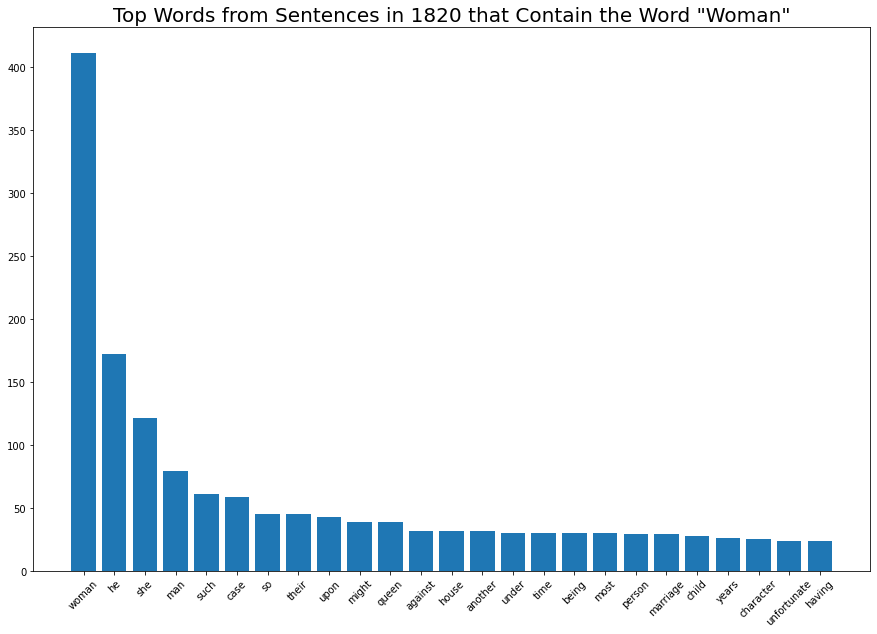

In [47]:
top_words_1820 = dict(hansard_1820_count.most_common(25))

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words_1820)), list(top_words_1820.values()), align='center')
plt.title('Top Words from Sentences in 1820 that Contain the Word "Woman"', fontsize=20)
plt.xticks(range(len(top_words_1820)), list(top_words_1820.keys()))
plt.xticks(rotation = 45)
plt.show()

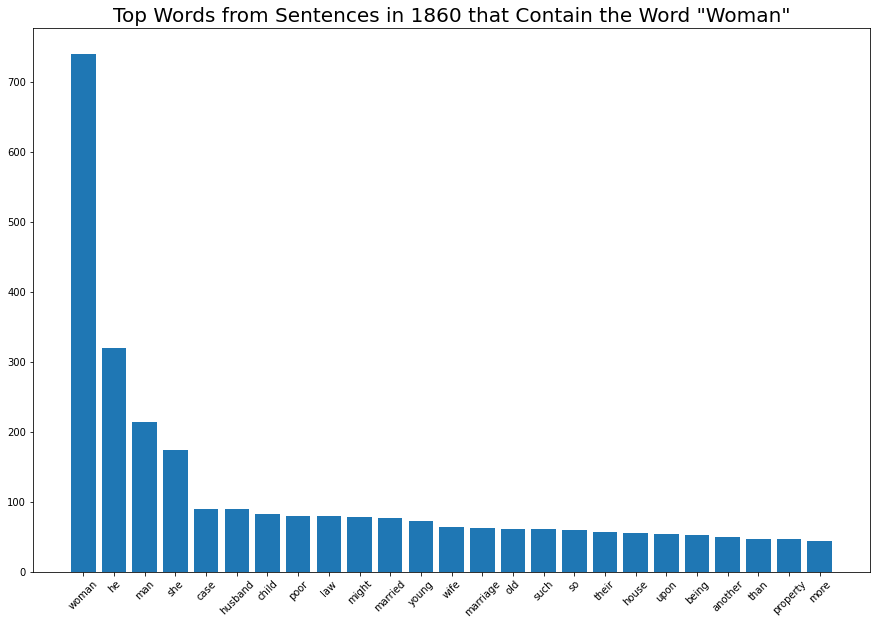

In [48]:
top_words_1860 = dict(hansard_1860_count.most_common(25))

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words_1860)), list(top_words_1860.values()), align='center')
plt.title('Top Words from Sentences in 1860 that Contain the Word "Woman"', fontsize=20)
plt.xticks(range(len(top_words_1860)), list(top_words_1860.keys()))
plt.xticks(rotation = 45)
plt.show()

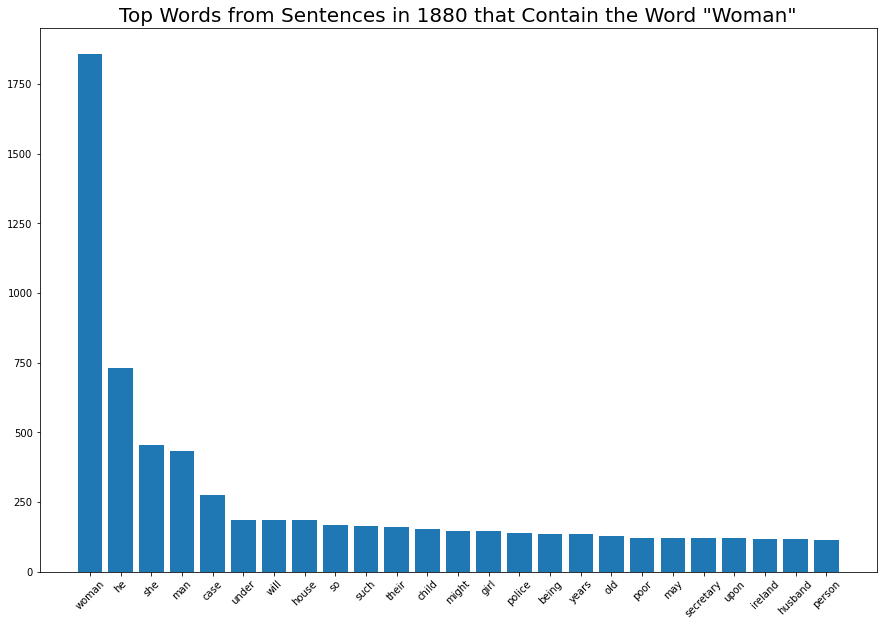

In [49]:
top_words_1880 = dict(hansard_1880_count.most_common(25))

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words_1880)), list(top_words_1880.values()), align='center')
plt.title('Top Words from Sentences in 1880 that Contain the Word "Woman"', fontsize=20)
plt.xticks(range(len(top_words_1880)), list(top_words_1880.keys()))
plt.xticks(rotation = 45)
plt.show()

### Assignment
When we first counted words in the Old Baily trial our results contained a lot of stop words. While we did manage to remove lots of stop words from our Hansard data using the same list of stop words designed for our Old Bailey data, it does seem like we need to remove more. 

Here are some reasons why: unlike the Old Bailey transcripts the Hansard Parliamentary debates mentions words like "house" (refering to the House of Commons and the House of Lords). We also see words like "may" and "did" in our visualizations. 

It makes sense that different documents are benefited by a different list of stop words. If we were removing stop words from the NPR article, we might want to keep words like "house," but remove words having to do with reporters.

Your assignment is to think critically about which words are meaningful for analysis and which words can be removed. Keep in mind that the words you choose to keep or remove will reveal different dimensions of the corpus. Some popular stop words lists include words like gendered pronouns because they are stated so frequently. Removing these might give me insight into the non-human events depicted by a document, but what kinds of information would I be loosing? Depending on my research question, is this loss justified or could it inadvertently tell a story that we did not mean to tell?

Keep these questions in mind while you come up with your list of stop words. When you think a word should be removed you can add it to your `stop_words` list.

In [50]:
stop_words = stop_words + [ 'might', 'bill', 'such', 'so'] 

print(stop_words)

['the', 'i', 'to', 'was', 'of', 'in', 'me', 'about', 'and', 'a', 'on', 'not', 'that', 'at', 'it', 'have', 'had', 'my', 'with', 'for', 'is', 'did', 'as', 'there', 'from', 'or', 'were', 'been', 'but', 'they', 'when', 'went', 'do', 'this', 'two', 'would', 'we', 'saw', 'never', 'be', 'before', 'an', 'got', 'after', 'say', 'some', 'see', 'them', 'up', 'go', 'because', 'seen', 'no', 'came', 'out', 'asked', 'took', 'cannot', 'what', 'you', 'could', 'if', 'by', 'which', 'told', 'any', 'has', 'put', 'are', 'then', 'other', 'mr', 'made', 'should', 'into', 'where', 'used', 'said', 'last', 'think', 'said', 'left', 'one', 'whether', 'gave', 'only', 'am', 'pm', 'very', 'come', 'all', 'between', 'statement', 'first', 'three', 'remember', 'every', 'who', 'take', 'can', 'said', 'know', 'him', 'his', 'her', 'hers', 'might', 'bill', 'such', 'so']


After adding to this list, rerun the code to remove stop words and plot top words. Let's see whether we can learn anything about how the sentences regarding women changed throughout the 19th-century. 